In [3]:
#from pandas_datareader import data -- Catalina seems to have broken pdr ... well fuck me.
import pandas_datareader as pdr
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt

pdr.DataReader('PFF','yahoo','2015')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,39.639999,39.410000,39.410000,39.610001,2690100.0,30.164480
2015-01-05,39.639999,39.400002,39.639999,39.459999,2236700.0,30.050247
2015-01-06,39.540001,39.450001,39.480000,39.500000,1956600.0,30.080704
2015-01-07,39.619999,39.529999,39.560001,39.590000,1991600.0,30.149256
2015-01-08,39.720001,39.619999,39.660000,39.639999,2237000.0,30.187326
...,...,...,...,...,...,...
2019-11-14,37.320000,37.250000,37.290001,37.279999,2638700.0,37.279999
2019-11-15,37.330002,37.259998,37.290001,37.320000,2672900.0,37.320000
2019-11-18,37.320000,37.259998,37.310001,37.259998,2552900.0,37.259998


In [27]:
''' an option in JSON
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome()
orig = "http://www.dividend.com/ex-dividend-dates.php?from_filter=yes&ex_div_date_min=2018-01-11&ex_div_date_max=2018-01-11&common_shares=on&preferred_shares=on&adrs=on&etns=on&funds=on&notes=on&etfs=on&reits=on"
url = "https://www.dividend.com/ex-dividend-dates/#tm=3-ex-div-dates&r=Webpage%231280&f_22_from=today"
driver.get(url)
soup = BeautifulSoup(driver.page_source,"lxml")
driver.quit()
table = soup.select("table#ex-dividend-dates")[0]
list_row =[[tab_d.text.strip().replace("\n","") for tab_d in item.select('th,td')]
            for item in table.select('tr')]

for data in list_row[:2]:
    print(' '.join(data))
'''

'\nfrom selenium import webdriver\nfrom bs4 import BeautifulSoup\n\ndriver = webdriver.Chrome()\norig = "http://www.dividend.com/ex-dividend-dates.php?from_filter=yes&ex_div_date_min=2018-01-11&ex_div_date_max=2018-01-11&common_shares=on&preferred_shares=on&adrs=on&etns=on&funds=on&notes=on&etfs=on&reits=on"\nurl = "https://www.dividend.com/ex-dividend-dates/#tm=3-ex-div-dates&r=Webpage%231280&f_22_from=today"\ndriver.get(url)\nsoup = BeautifulSoup(driver.page_source,"lxml")\ndriver.quit()\ntable = soup.select("table#ex-dividend-dates")[0]\nlist_row =[[tab_d.text.strip().replace("\n","") for tab_d in item.select(\'th,td\')]\n            for item in table.select(\'tr\')]\n\nfor data in list_row[:2]:\n    print(\' \'.join(data))\n'

In [40]:
from yahoofinancials import YahooFinancials

tech_stocks = ['AAPL', 'MSFT', 'INTC']

yahoo_financials_tech = YahooFinancials(tech_stocks)

daily_tech_stock_prices = yahoo_financials_tech.get_historical_price_data('2008-09-15', '2018-09-15', 'daily')
tech = daily_tech_stock_prices
#tech.get_exdividend_date() -- doesn't seem to work on list...

yahoo_financials = YahooFinancials('AAPL')
print(yahoo_financials.get_key_statistics_data())
aapl = yahoo_financials
aapl.get_exdividend_date()

{'AAPL': {'annualHoldingsTurnover': None, 'enterpriseToRevenue': 4.142, 'beta3Year': None, 'profitMargins': 0.21500999, 'enterpriseToEbitda': 14.017, '52WeekChange': 0.06630409, 'morningStarRiskRating': None, 'forwardEps': 12.76, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 4519199744, 'fundInceptionDate': '-', 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 21.286, 'sharesShort': 43933897, 'sharesPercentSharesOut': 0.0097, 'fundFamily': None, 'lastFiscalYearEnd': 1538179200, 'heldPercentInstitutions': 0.60946, 'netIncomeToCommon': 55694999552, 'trailingEps': 11.777, 'lastDividendValue': None, 'SandP52WeekChange': 0.087837696, 'priceToBook': 11.106361, 'heldPercentInsiders': 0.00074, 'nextFiscalYearEnd': 1601337600, 'yield': None, 'mostRecentQuarter': 1561766400, 'shortRatio': 1.62, 'sharesShortPreviousMonthDate': '2019-08-30', 'floatShares': 4263710755, 'beta': 1.095862, 'enterpriseValue': 1072964239360, 'priceHint': 2, 'threeYearAverageReturn': None, 'last

'2019-08-09'

In [53]:
tech_stocks = ['AAPL', 'MSFT', 'INTC']

divYield = dict()
divDate = dict()
for i in tech_stocks:
    temp = YahooFinancials(i)
    #divs.append(i.get_exdividend_date())
    divYield[i] = temp.get_dividend_yield()
    divDate[i] = temp.get_exdividend_date()

print(divYield,divDate)

{'AAPL': 0.013099999, 'MSFT': 0.0145000005, 'INTC': 0.024} {'AAPL': '2019-08-09', 'MSFT': '2019-08-14', 'INTC': '2019-08-06'}


In [60]:
import pandas as pd
#IS ALL PANDAS BROKEN? JESUS

#stk_df = pd.read_csv("/stock_list.csv")
stks = []
#stks.append(stk_df.tickers)


def create_sorted_exDiv(lst):
    '''takes a list of potential stocks, returns dicts with sec:yield & sec:exdiv (sorted by yield, within 10 days)'''
    divYield = dict()
    divDate = dict()
    for i in lst:
        temp = YahooFinancials(i)
        divYield[i] = temp.get_dividend_yield()
        divDate[i] = temp.get_exdividend_date()
    divYield = sorted(divYield.items(),key=lambda kv: kv[1],ascending=False)
    divDate = sorted(divDate.items(),key=lambda kv: kv[1])
    #compare to pd.DateTime value -- so much easier in pandas.
    #curr = [divDate[i] for i in divDate if divDate[i] < (dt.datetime.now()+dt.timedelta(10))]  to filter by date, lst
    #curr_dct = {k:v for (k,v) in divDate if divDate[k] < (dt.datetime.now() + dt.timedelta(10))} #to keep in dict
    return divYield,divDate


In [68]:
'''When Pandas fucking works...'''

def sorted_div_df(stk_lst,topX,XDays):
    '''takes a list of potential stocks -- returns DF sorted by divYield & ex div within X days'''
    for i in stk_lst:
        temp = YahooFinancials(i)
        divYield.append(temp.get_dividend_yield())
        divDate.append(temp.get_exdividend_date())
    #Create DF
    data = {'sec':stk_lst,'divDate':divDate,'divYield':divYield}
    df = pd.DataFrame(data)
    
    cutoffDate = dt.datetime.now() + dt.timedelta(days=XDays) #This may be pd/dt logic -- confirm.
    curr = df.loc[df['divDate'] < cutoffDate]
    return curr.sort_by(by='divYield',ascending=False).head(topX)

import pandas_datareader as pdr #THANK GOD 

In [6]:
'''BEGIN STAT ARB -- COINTEGRATION TESTING & MEAN REVERSION TRADES !!''' 

googl = pdr.DataReader('googl','yahoo','2015')
goog = pdr.DataReader('goog','yahoo','2015')

z = pdr.DataReader('z','yahoo','2015').Close.pct_change()
zg = pdr.DataReader('zg','yahoo','2015').Close.pct_change()

dc = pdr.DataReader('disca','yahoo','2015').Close.pct_change()
dk = pdr.DataReader('disck','yahoo','2015').Close.pct_change()

gl = googl['Close'].pct_change()
gg = goog['Close'].pct_change()

#g = pd.concat([gl,gg],join='inner') #Not working
df = pd.DataFrame({'goog':gg,'googl':gl,'z':z,'zg':zg,'dc':dc,'dk':dk})
corr = df.corr()
corr

,goog,googl,z,zg,dc,dk
goog,1.000000,0.991959,0.226126,0.217000,0.202940,0.214431
googl,0.991959,1.000000,0.226244,0.218432,0.202386,0.214222
z,0.226126,0.226244,1.000000,0.963918,0.230335,0.234311
zg,0.217000,0.218432,0.963918,1.000000,0.221714,0.223988
dc,0.202940,0.202386,0.230335,0.221714,1.000000,0.977716
dk,0.214431,0.214222,0.234311,0.223988,0.977716,1.000000


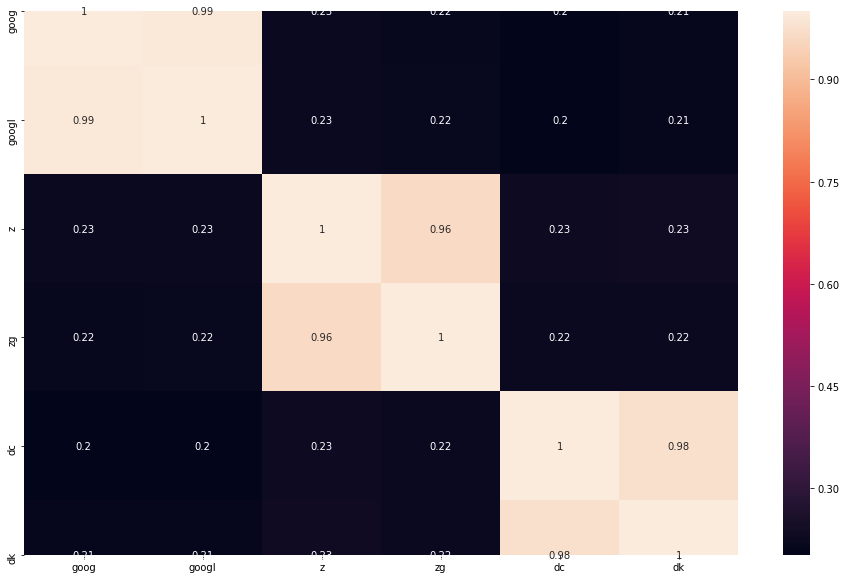

In [7]:
import seaborn as sns
ax = sns.heatmap(corr,annot=True)
ax.figure.set_size_inches(16,10)

Threshold is : 0.9829177020166796


Text(0.5, 0, 'Date')

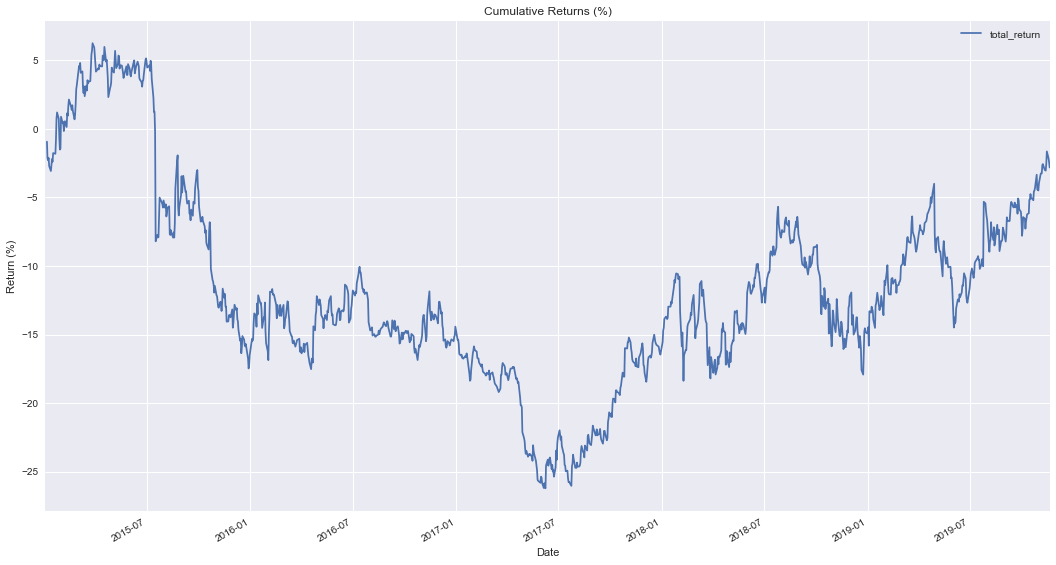

In [8]:
import numpy as np

g = goog.Close
gl = googl.Close
g = pd.DataFrame({'goog':g,'googl':gl})

g['g_pct'] = g.goog.pct_change()
g['gl_pct'] = g.googl.pct_change()

#g['Avg'] = ((g['goog'] + g['googl']).rolling(10).mean())/2 #Too slow
g['avg'] = (g.goog + g.googl)/2
g

'''TRY WITH FIRST DERIVATIVE -- if no luck, go to 2ND DERIVATIVE '''
g['spread'] = g.goog / g.googl #think this is how you do it.  this is goog per googl, 1+ means goog is larger, thus short. < 1 = long  
#THRES = g.spread.rolling(30).mean()

'''INPUTS -- RIGHT HERE'''
THRES = g.spread.mean()
print("Threshold is :",THRES)

QTY = 50

'''Long is where goog is long, googl is short (spread is < THRES, so goog is smaller than googl relatively)
Short is where goog short, googl is long -- multiply le by position ()'''
g['Pos'] = np.where(g['spread'] < THRES,1,-1) #Else -1 (short)
#g['SE'] = np.where(g['spread'] > THRES,-1,0)

#When spread < 1, (goog is smaller than ratio -- g_pct * +1 (pos) + gl_pct * -pos (short)) -- in short, pos is changing from -1 to 1, but pcts stay same
goog_long = (g['g_pct'] * g['Pos']) + (g['gl_pct'] * -1 * g['Pos']) * QTY
goog_short = (g['g_pct'] * g['Pos']) + (g['gl_pct'] * -1 * g['Pos']) * QTY
g['Ret'] = np.where(g['spread'] < THRES,goog_long,goog_short)
g.head()

g['total_return'] = g.Ret.cumsum()
g

plt.style.use('seaborn')
g.plot(y='total_return',figsize=(18,10),title='Cumulative Returns (%)')
plt.ylabel('Return (%)')
plt.xlabel('Date')

Cointegration test -- pValue:  0.06987023417164304


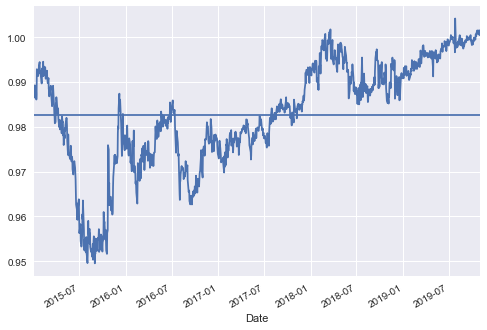

In [157]:
gg = goog.Close
type(gg)
gl = googl.Close
type(g)

from statsmodels.tsa.stattools import coint

score,p_value,_ = coint(gg,gl)
print('Cointegration test -- pValue: ',p_value) #Just outside the bounds (.05) -- but likely close enough ~

g.spread.plot()
plt.axhline(g.spread.mean()) #This is why it's not returning incredibly well...



Text(0, 0.5, 'Ratio')

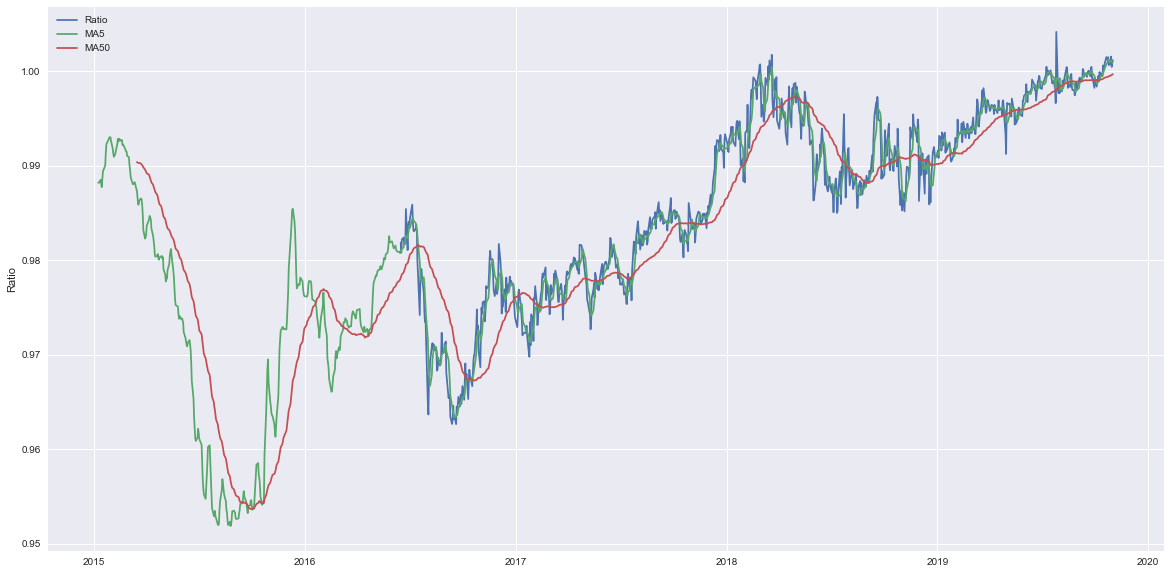

In [180]:
'''Lets check it out a bit more... treat it like a neural network'''

ratios = g.spread
ratios.shape[0] *.30 # ~365 
train = ratios[365:]
test = ratios[:365]

ma5 = ratios.rolling(window=5,center=False).mean()
ma50 = ratios.rolling(window=50,center=False).mean()

std50 = ratios.rolling(window=50,center=False).std()

z_score = (ma5 - ma50)/std50

plt.figure(figsize=(20,10))
plt.plot(train.index,train.values)
plt.plot(ma5.index,ma5.values)
plt.plot(ma50.index,ma50.values)

plt.legend(['Ratio','MA5','MA50'])
plt.ylabel('Ratio')

Text(0.5, 0.98, 'BINGO!')

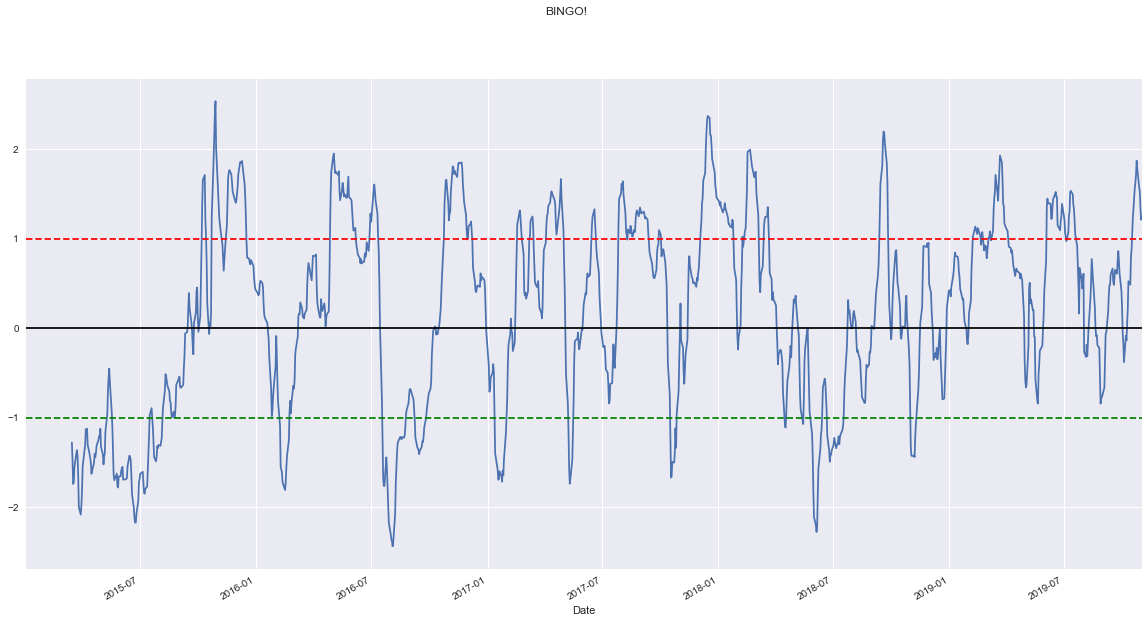

In [188]:
'''Lets see if zscore has some value ? That may be more normal...'''

plt.figure(figsize=(20,10))
z_score.plot()
plt.axhline(0,color='black')
plt.axhline(-1,color='green',linestyle='--')
plt.axhline(1,color='red',linestyle='--')
plt.suptitle('BINGO!')

In [26]:
'''2nd Derivative -- compare ratio to spread -- use 50 and 5 windows 
I pulled this from an old Eurodollar strategy of mine, really hoping it works.'''

LOG = False #Turn on if you would like to see trades


# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    returns = []
    ret = set()
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            #returns.append(money)
            countS1 -= 1
            countS2 += ratios[i]
            if LOG: print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            #returns.append(money)
            countS1 += 1
            countS2 -= ratios[i]
            if LOG: print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            #returns.append(money)
            countS1 = 0
            countS2 = 0
            if LOG: print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
        #ret.add(money)
        returns.append(money)
            
    return money,returns

Total Return:  402.33641487330544


Text(0.5, 0.98, 'Return in Days')

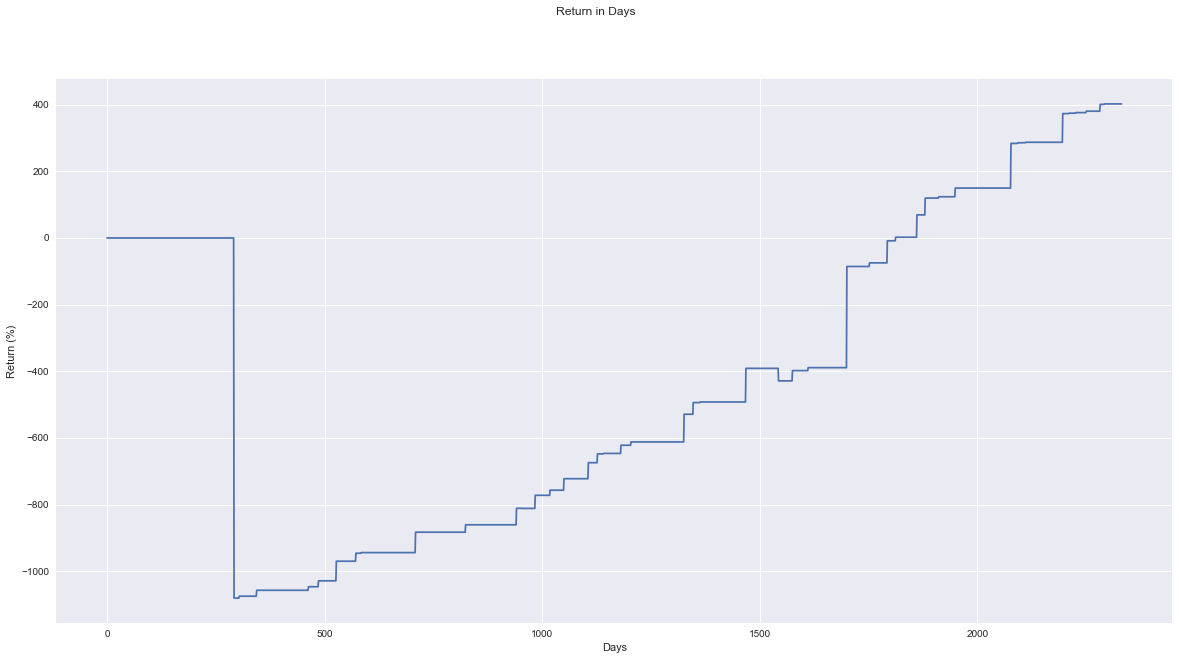

In [262]:
total_ret, ret_set, ret_list = trade(gg,gl,50,5)
print('Total Return: ',total_ret)

final = []
for i in ret_list:
    if i not in final:
        final.append(i)
        
        
 
plt.figure(figsize=(20,10))
plt.plot(ret_list)
plt.xlabel('Days')
plt.ylabel('Return (%)')
plt.suptitle('Return in Days')

Text(0.5, 0.98, 'Return per Trade')

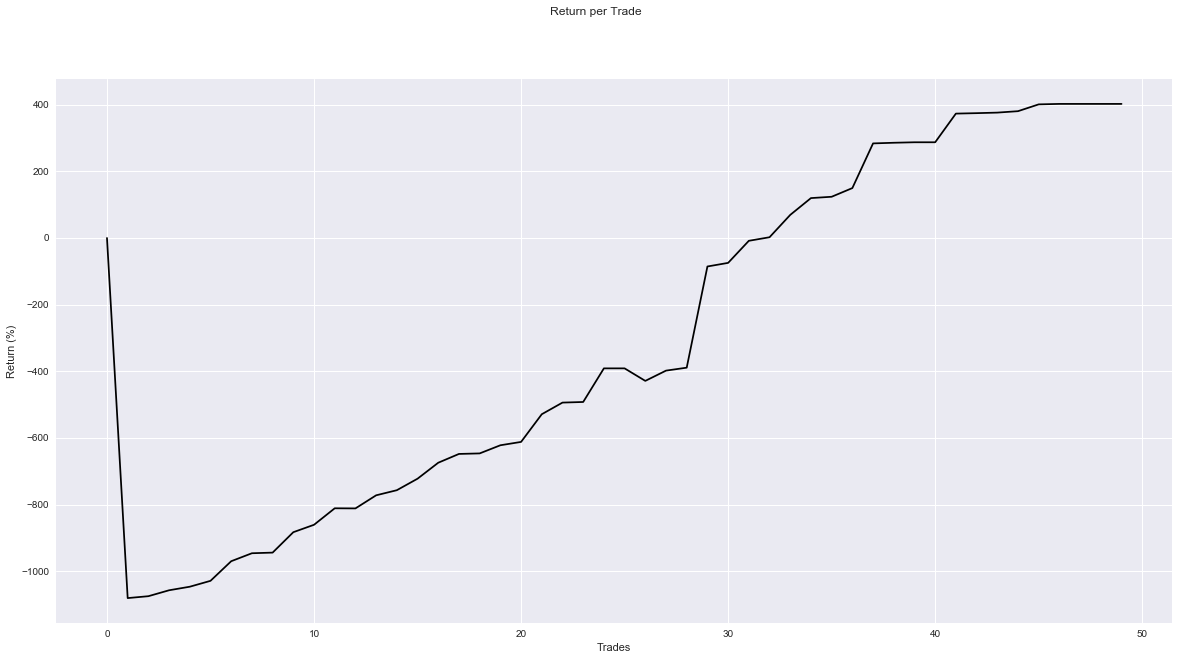

In [263]:
plt.figure(figsize=(20,10))
plt.plot(final,color='black')
plt.xlabel('Trades')
plt.ylabel('Return (%)')
plt.suptitle('Return per Trade')

Total Return 417.2537818021417


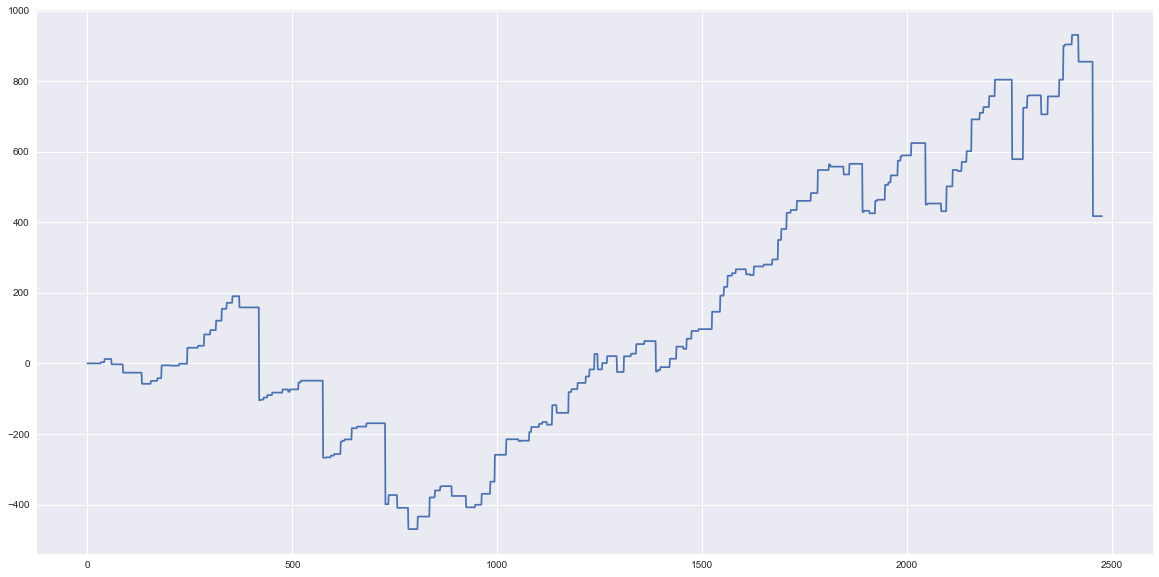

In [281]:
aapl = pdr.DataReader('aapl','yahoo','2010').Close
adbe = pdr.DataReader('adbe','yahoo','2010').Close

total, ret_list = trade(aapl,adbe,20,5)

print("Total Return",total)
plt.figure(figsize=(20,10))
plt.plot(ret_list)

Text(0.5, 0.98, 'Momentum Baby!')

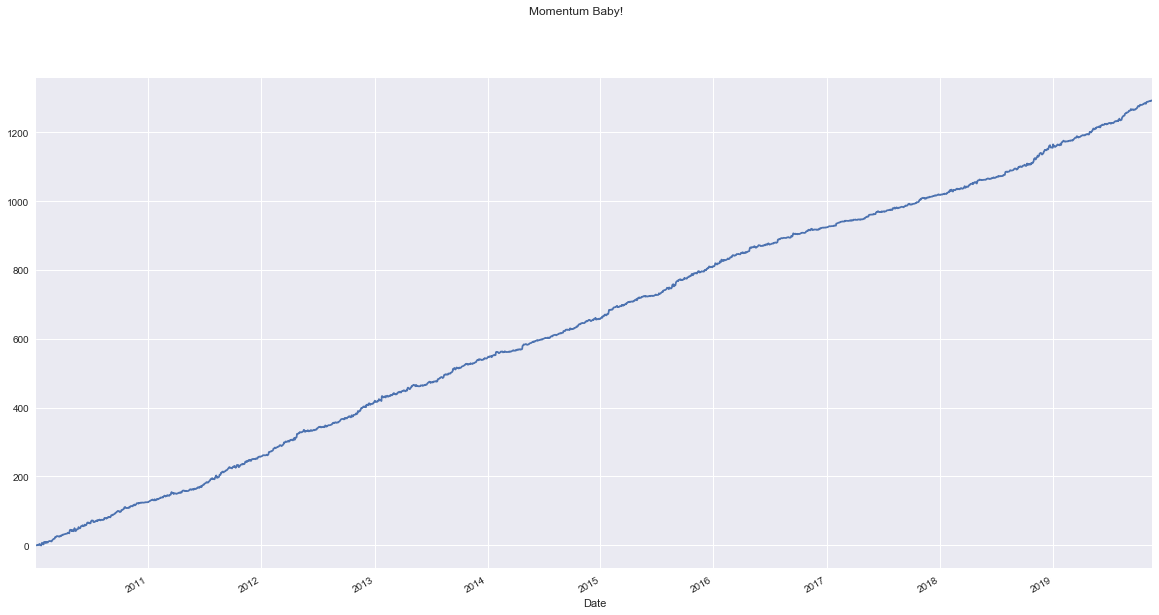

In [9]:
QTY = 100
aapl = pdr.DataReader('aapl','yahoo','2010')
aapl['MA15'] = aapl.Close.rolling(window=15).mean()
aapl['Pos'] = np.where(aapl.Close > aapl.MA15,1,-1)
aapl['Ret'] = (aapl.Close.pct_change() * aapl.Pos)*QTY
aapl['Total Ret'] = aapl.Ret.cumsum()
aapl

plt.figure(figsize=(20,10))
tr = aapl['Total Ret']
dr = aapl['Ret']
tr.plot(x='Total Ret')
plt.suptitle('Momentum Baby!')

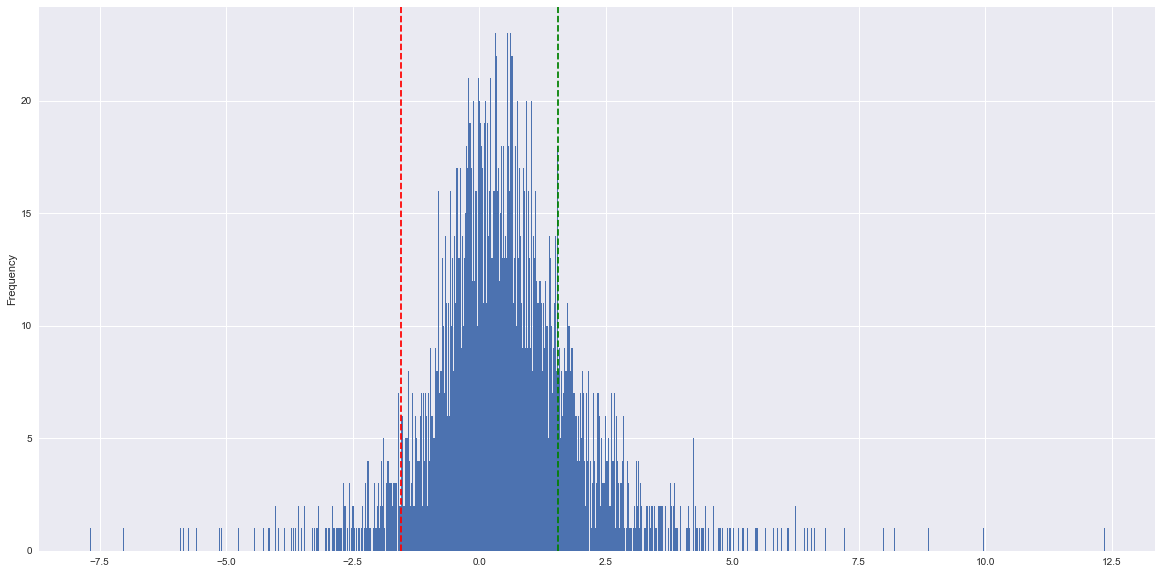

In [470]:
plt.figure(figsize=(20,10))
dr.plot(kind='hist',bins=1000)
plt.axvline(-dr.std(),color='red',linestyle='--')
plt.axvline(dr.std(),color='green',linestyle='--')

In [9]:
import datetime
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from statsmodels.tsa.stattools import coint
#import fix_yahoo_finance as yf

start_sp = datetime.datetime(2000, 12, 12)
end_sp = datetime.datetime(2016, 12, 12)
#yf.pdr_override() 



data = pd.DataFrame()

stocks = ['AAPL', 'ADBE', 'SYMC', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM']


for ticker in stocks:
  name = str(ticker)
  df = pdr.DataReader(name,'yahoo','2000-12-12', '2016-12-12')
  data[name] = df['Adj Close']


'''Lets make this modular as well : ) '''

def sec_df(seclst,beg='2010',end='2016'):
    '''Returns a DF of Adj Close values of stocks in seclst from beg to end'''
    data = pd.DataFrame()
    for ticker in seclst:
        name = str(ticker)
        df = pdr.DataReader(name,'yahoo',beg,end)
        data[name] = df['Adj Close']
    return data

#dftest = sec_df(stocks) #Works!
#dftest

In [10]:
def find_cointegrated_pairs(data):
  '''Returns matrices of scores, pvals, and pairs respectively '''
  n = data.shape[1]
  score_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))
  keys = data.keys()
  pairs = [] # We store the stock pairs that are likely to be cointegrated
  for i in range(n):
    for j in range(i+1, n):
      S1 = data[keys[i]]
      S2 = data[keys[j]]
      result = coint(S1, S2)
      score = result[0] # t-score
      pvalue = result[1]
      score_matrix[i,j] = score
      pvalue_matrix[i, j] = pvalue
      if pvalue < 0.02:
        pairs.append((keys[i], keys[j]))
  return score_matrix, pvalue_matrix, pairs


scores, pvals, pair = find_cointegrated_pairs(data)

In [13]:
pair

[('ADBE', 'MSFT'), ('SYMC', 'EBAY'), ('JNPR', 'AMD'), ('JNPR', 'IBM')]

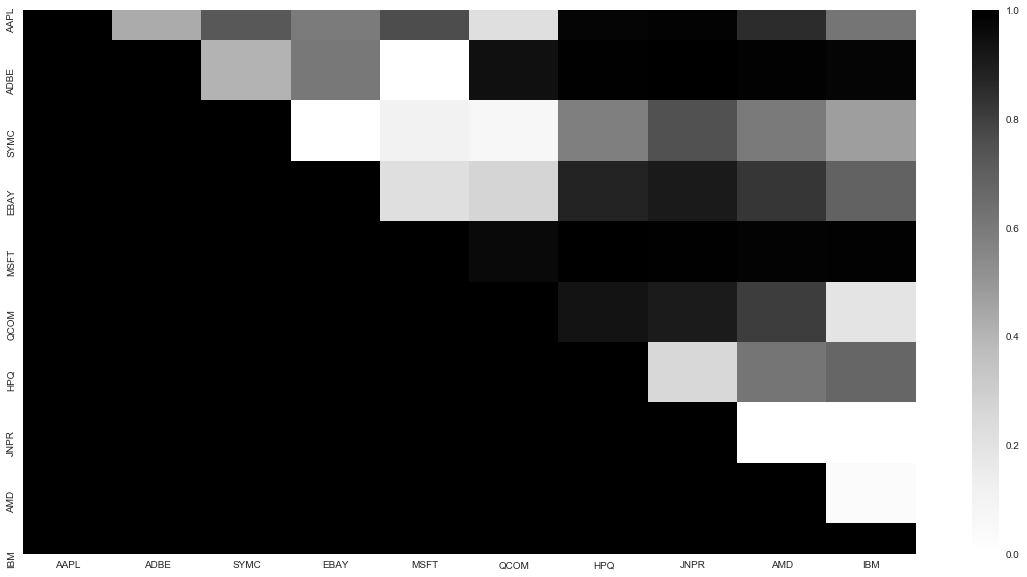

In [328]:

m = [0,.2,.4,.6,.8,1]
ax = sns.heatmap(pvals,xticklabels=stocks,yticklabels=stocks,cmap='Greys')
ax.figure.set_size_inches(20,10)

Total Return: MSFT x ADBE 1315.7604933048992
Total Return 1315.7604933048992
sz 4026
Avg Annual Return:  219.29341555081655
Cumulative Return (%) by Year
Year 1: 168.0%
Year 2: 340.0%
Year 3: 663.0%
Year 4: 994.0%
Year 5: 1142.0%


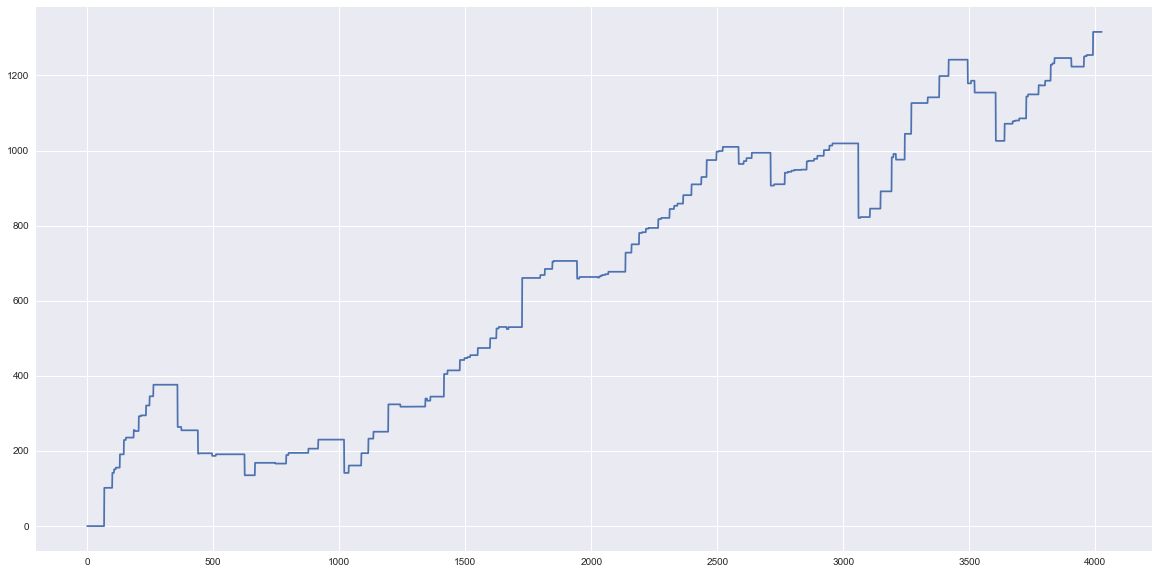

In [31]:
LOG = False

total, ret_list = trade(data['MSFT'],data['ADBE'],50,5)

print("Total Return: MSFT x ADBE",total)
print("Total Return",total)
plt.figure(figsize=(20,10))
plt.plot(ret_list)

year = int(len(ret_list) / 6)
sz = len(ret_list)
print('sz',sz)
print("Avg Annual Return: ",total/6)

#Get actual average
yrs = [ret_list[i] for i in range(0,sz,year)]
yrs

print('Cumulative Return (%) by Year')
for i in range(1,len(yrs)):
    print("Year {}: {}%".format(i,round(yrs[i]),4))

Average Annual Return
Year 1: 169.04%
Year 2: 171.7%
Year 3: 324.76%
Year 4: 331.94%
Year 5: 148.02%


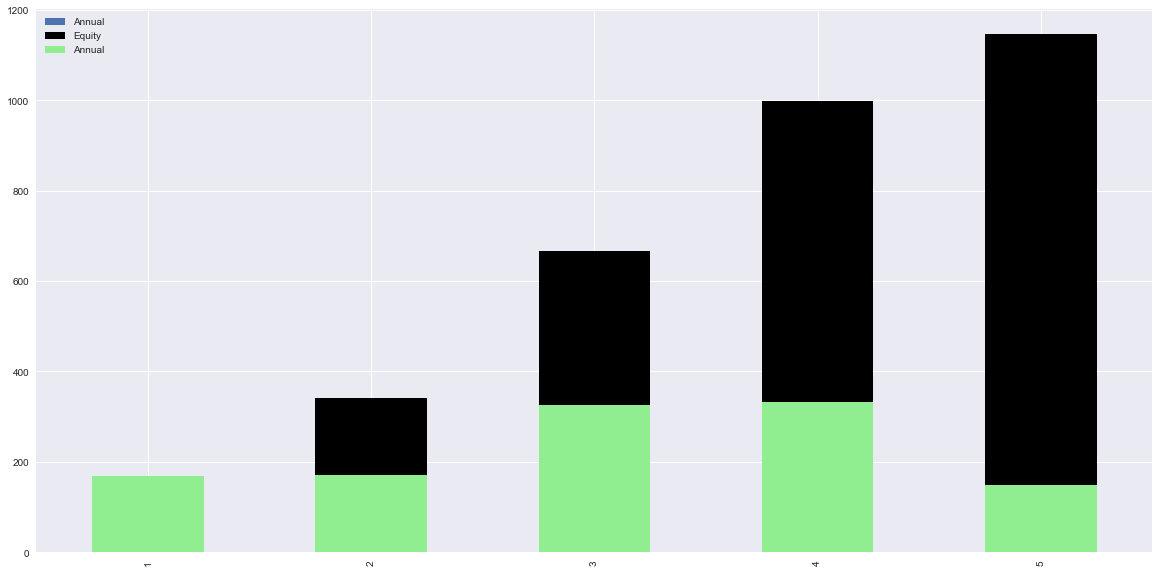

In [456]:
diff = []
i=0
while i < 5:
    diff.append(yrs[i+1]-yrs[i])
    i += 1
    
diff.insert(0,0) #Make them same size 

ret_df = pd.DataFrame({'Annual':diff,'Equity':yrs})
#fig, ax = plt.subplots(nrows=2, ncols=1)
#fig.set_size_inches(20,10)
#ax.plot(x=diff)


ret_df = ret_df.iloc[1:]

ax = ret_df.plot(y="Annual", kind="bar",figsize=(20,10))
ret_df.plot( y="Equity", kind="bar", ax=ax, color="Black")
ret_df.plot( y="Annual", kind="bar", ax=ax, color="LightGreen")

print("Average Annual Return")
for i in range(1,len(diff)):
    print("Year {}: {}%".format(i,round(diff[i],2)))

/Users/zoakes/opt/anaconda3/lib/python3.7/site-packages/empyrical/stats.py:1492: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Start date,2010-01-04
End date,2019-11-20
Total months,118
,Backtest
Annual return,1.0855955619412328e+26%
Cumulative returns,2.511376940265293e+239%
Annual volatility,2454.9%
Sharpe ratio,5.32
Calmar ratio,2650051555063785472.00
Stability,NaN
Max drawdown,-40965073.3%


/Users/zoakes/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,40965073.30,2019-08-05,2019-09-11,2019-09-13,30
1,6743766.05,2016-11-04,2017-03-01,2017-03-21,98
2,6629979.51,2012-04-16,2012-05-17,2012-05-21,26
3,4400184.20,2012-01-18,2012-02-14,2012-02-15,21
4,206847.25,2015-01-16,2015-01-29,2015-01-30,11


Stress Events,mean,min,max
US downgrade/European Debt Crisis,82.08%,-588.88%,546.28%
Fukushima,21.38%,-260.99%,446.40%
EZB IR Event,64.27%,-242.64%,260.13%
Flash Crash,34.43%,-768.68%,421.93%
Apr14,81.37%,-131.44%,819.82%
Oct14,74.74%,-146.48%,271.65%
Fall2015,88.46%,-573.55%,611.63%
Recovery,55.34%,-768.68%,887.41%
New Normal,50.35%,-704.22%,1235.58%


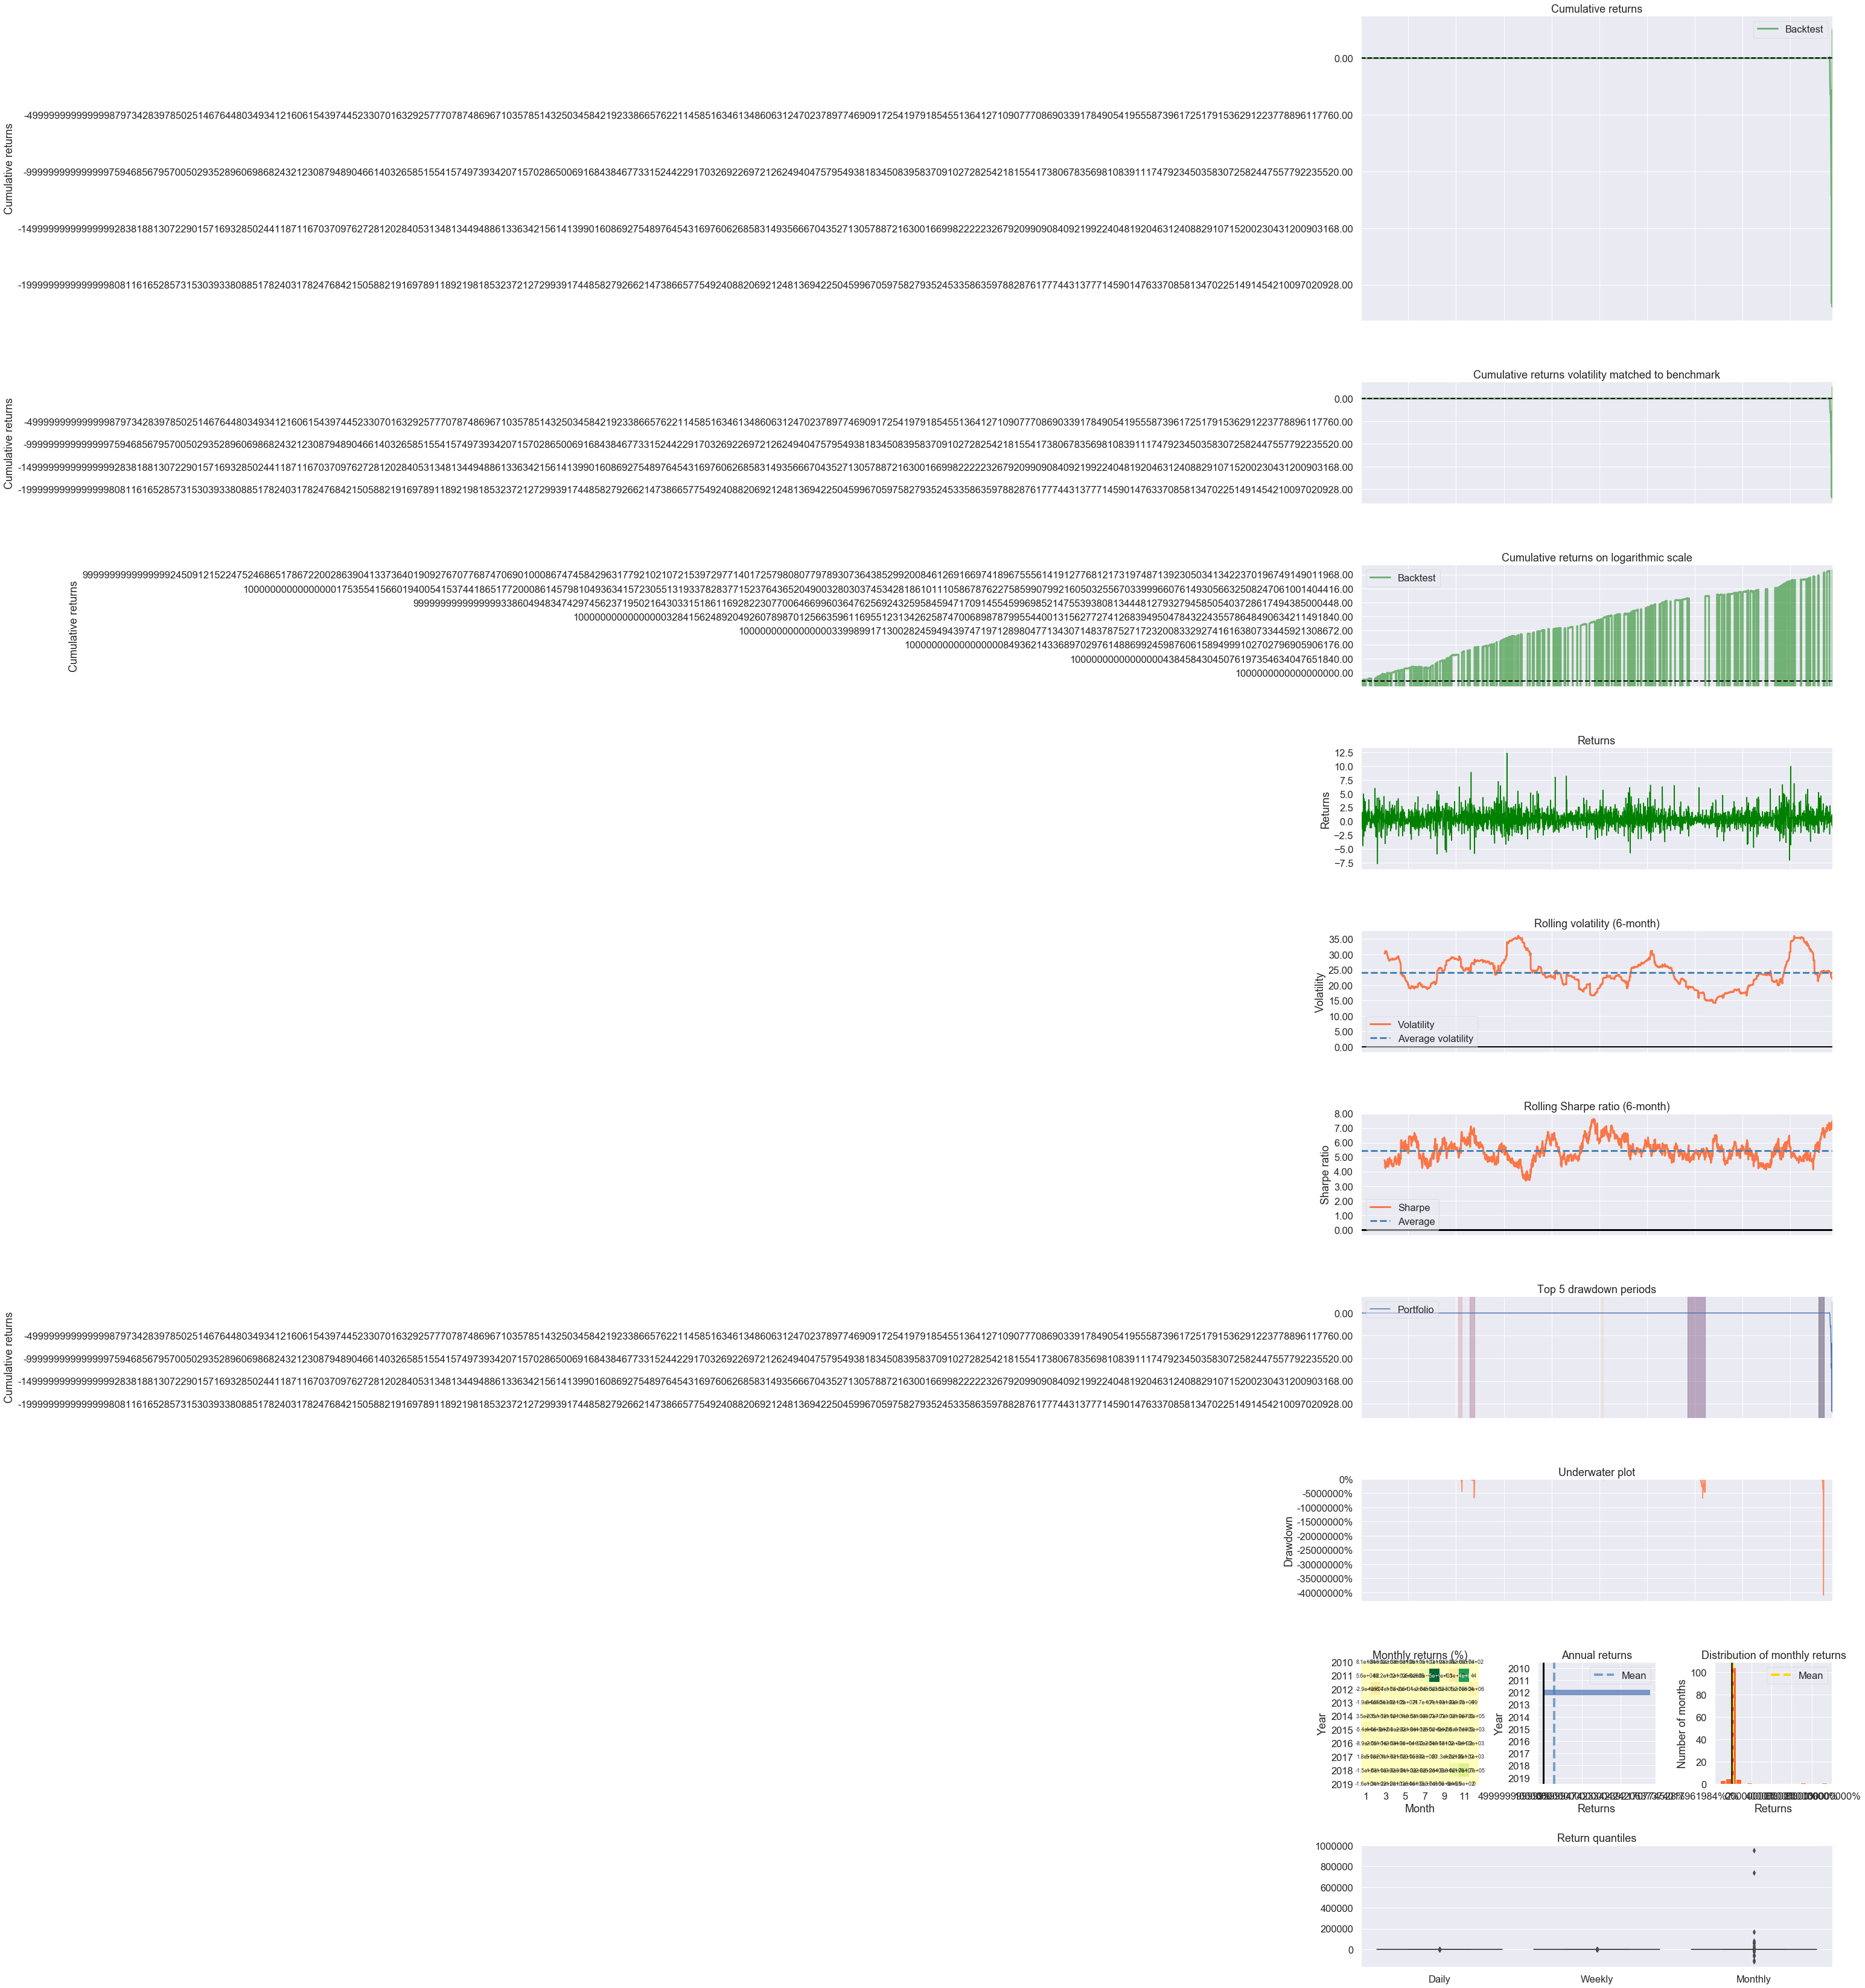

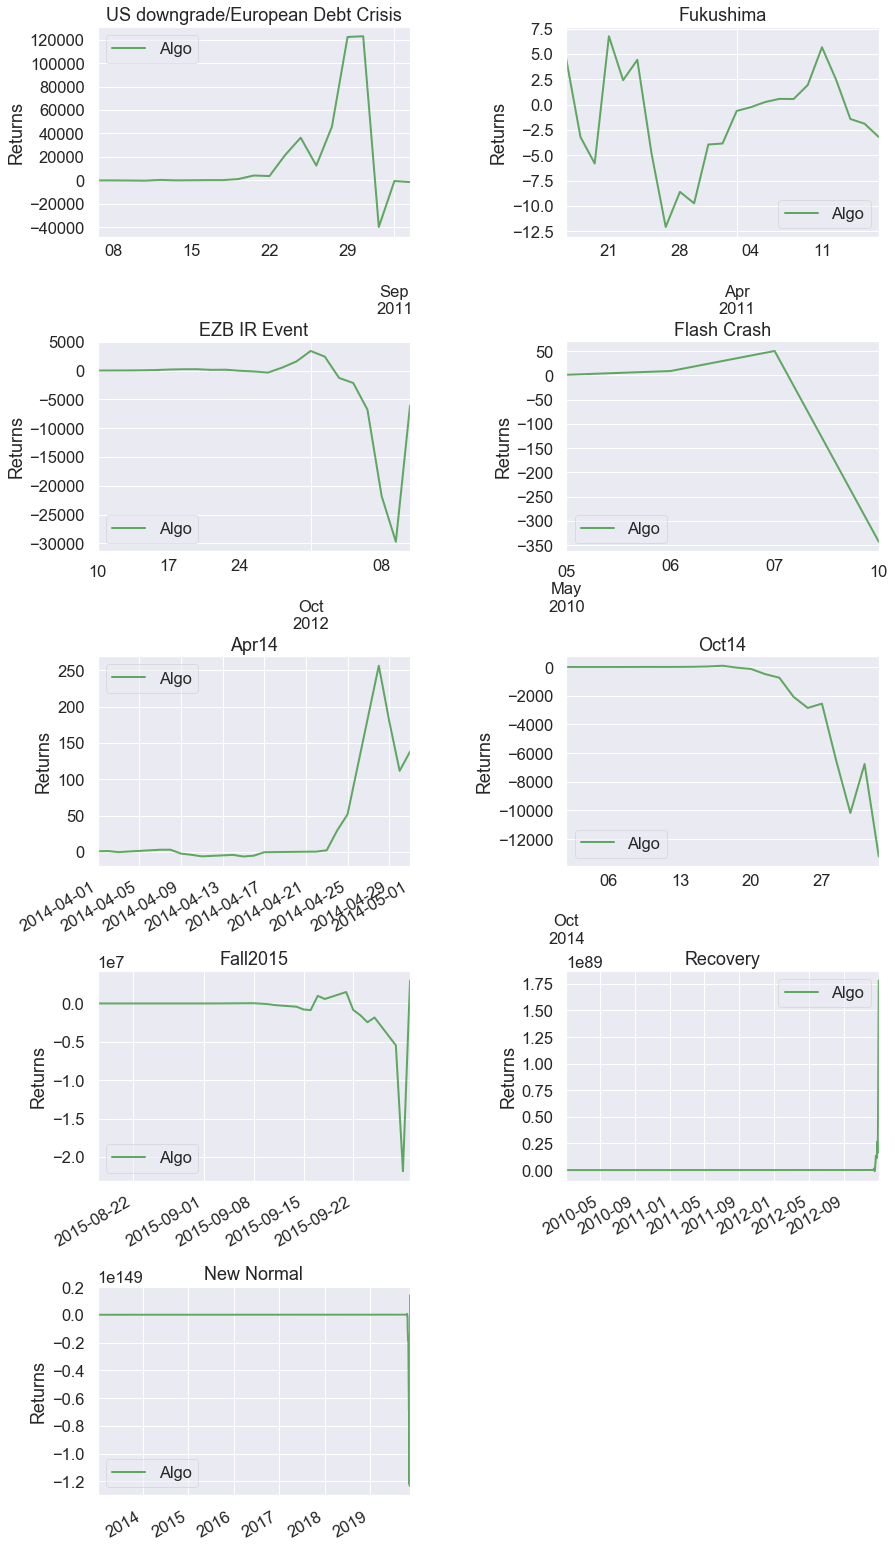

In [24]:
mom_aapl = aapl['Ret'].fillna(0)


import pyfolio as pf 

pf.create_full_tear_sheet(mom_aapl)

Start date,2000-12-12
End date,2016-12-13
Total months,191
,Backtest
Annual return,inf%
Cumulative returns,inf%
Annual volatility,nan%
Sharpe ratio,NaN
Calmar ratio,NaN
Stability,NaN
Max drawdown,0.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2000-12-12,2000-12-12,2000-12-12,1
1,0.00,2000-12-12,2000-12-12,2000-12-12,1
2,0.00,2000-12-12,2000-12-12,2000-12-12,1
3,0.00,2000-12-12,2000-12-12,2000-12-12,1
4,0.00,2000-12-12,2000-12-12,2000-12-12,1


ValueError: supplied range of [-38.51165494088581, inf] is not finite

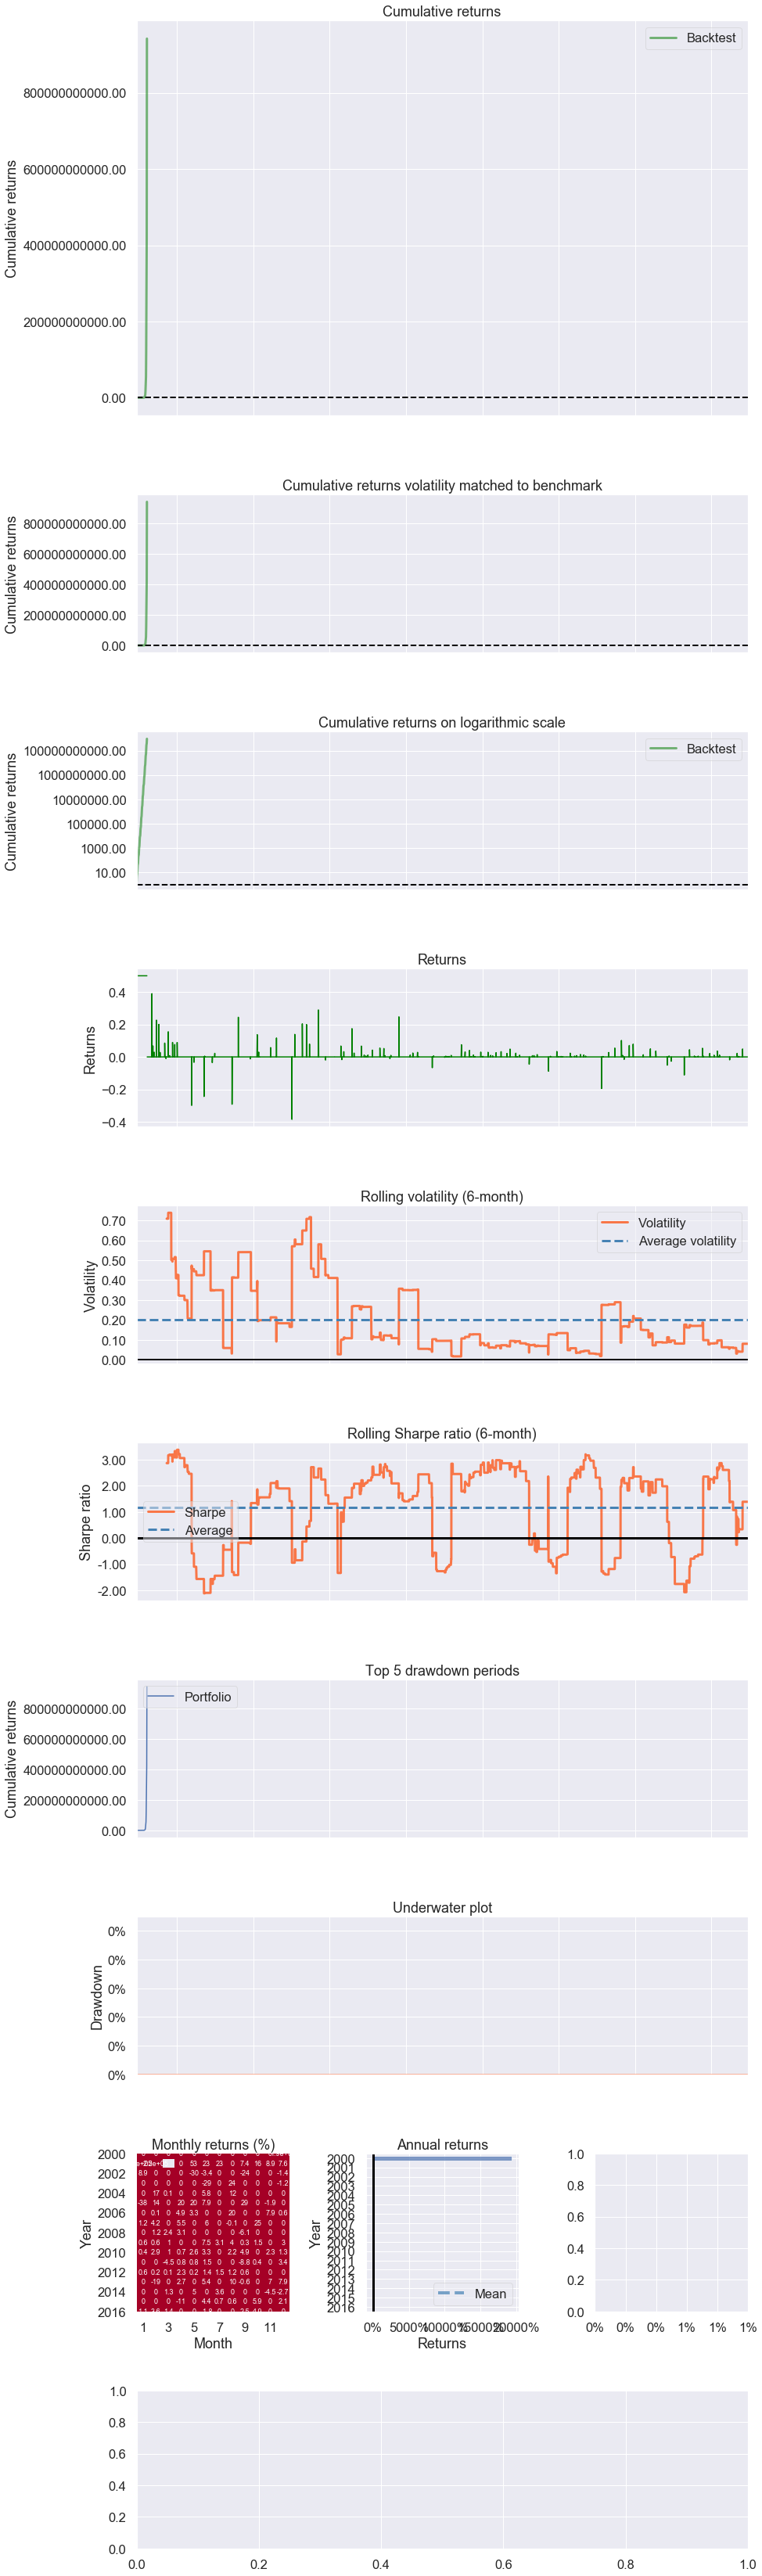

In [79]:
#pf.create_full_tear_sheet(ret_list)
mr_df = pd.DataFrame({'Returns':ret_list})
#pf.create_full_tear_sheet(mr_df['Returns'])
datanoi = data.reset_index()
mr_df['Date'] = datanoi['Date']
mr_df = mr_df.set_index('Date')
mrets = mr_df['Returns'].pct_change().fillna(.5)

'''Cannot get this to work, no matter how I manipulate it'''
pf.create_full_tear_sheet(mrets)